In [1]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import pickle

In [2]:
#read in file
with open('../data/data_simple_preprocess/complete_corpus_simple_preprocess.txt', 'rb') as file:
    complete_corpus_simple_preprocess = pickle.load(file)

In [14]:
for i in complete_corpus_simple_preprocess.keys():
    print(i)

Address of Tatian to the Greeks
Athenagoras the Athenian
Bible Complete
Clement of Alexandria Exhortation to the Heathen
Clement of Alexandria The Salvation of the Rich Man
Clement of Alexandria Trilogy
Clement of Alexandria, The Stromata
Dialogue of Justin, Philosopher and Martyr, with Trypho, a Jew
Epistle of Adrian Antoninus and Marcus Aurelius
Epistle of Clement of Rome
False Ignatius
Fragments of Papias
Fragments of the Lost Work of Justin on the Resurrection
Hippolytus of Rome Expository Treatise Against The Jews
Hippolytus of Rome Treatise On Christ and Antichrist
Igantius Syriac Epistles
Ignatius Other
Ireanaus Against Heresies Book III
Ireanaus Fragments from the Lost Writings
Irenaeus Against Heresies Book I
Irenaeus Against Heresies Book II
Irenaeus Against Heresies Book V
Ireneaus Against Heresies Book IV
Justin's Hortatory Address to the Greeks
New Testament
Old Testament
Origen
Tertullian
The Didache
The Epistle of Barnabas
The Epistle of Ignatius to Polycarp
The Epistle 

In [3]:
# Prepare data for Doc2Vec
tagged_data = [TaggedDocument(words=(text), tags=[title]) for title, text in complete_corpus_simple_preprocess.items()]

In [4]:
# Train a Doc2Vec model
model = Doc2Vec(vector_size=20, min_count=1, epochs=100)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [5]:
# Function to get similarity matrix
def get_similarity_matrix(model, texts):
    titles = list(texts.keys())
    vectors = [model.dv[title] for title in titles]
    similarity_matrix = cosine_similarity(vectors)
    return titles, similarity_matrix

In [6]:
# Get similarity matrix
titles, similarity_matrix = get_similarity_matrix(model, complete_corpus_simple_preprocess)

In [7]:
# Print similarity matrix
print("Similarity Matrix:\n", similarity_matrix)

Similarity Matrix:
 [[1.         0.8882598  0.11847643 ... 0.10593496 0.6539769  0.64420706]
 [0.8882598  1.         0.31665128 ... 0.05288878 0.65149033 0.6662893 ]
 [0.11847643 0.31665128 0.99999994 ... 0.3244875  0.2727172  0.43146455]
 ...
 [0.10593496 0.05288878 0.3244875  ... 1.         0.5044576  0.44359392]
 [0.6539769  0.65149033 0.2727172  ... 0.5044576  0.9999999  0.5411697 ]
 [0.64420706 0.6662893  0.43146455 ... 0.44359392 0.5411697  0.9999998 ]]


In [8]:
sim_matrix=pd.DataFrame(similarity_matrix)

In [9]:
counter = 0
for i in complete_corpus_simple_preprocess.keys():
    counter += 1
    if counter == 26:
        print(i)
        break

Old Testament


In [18]:
names=pd.DataFrame(complete_corpus_simple_preprocess.keys())

In [19]:
sim_matrix2=sim_matrix

In [20]:
sim_matrix2['names']=names
sim_matrix2.set_index('names')

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
names,,,,,,,,,,,,,,,,,,,,,
Address of Tatian to the Greeks,1.000000,0.888260,0.118476,0.838320,0.159114,0.460703,0.500640,0.265186,0.688223,0.072987,...,0.098709,0.172063,0.036149,0.568078,0.268541,0.203064,0.847470,0.105935,0.653977,0.644207
Athenagoras the Athenian,0.888260,1.000000,0.316651,0.655009,0.094571,0.239555,0.422692,-0.004878,0.640707,-0.048596,...,0.085676,0.040879,0.023724,0.523960,0.134395,0.191144,0.772674,0.052889,0.651490,0.666289
Bible Complete,0.118476,0.316651,1.000000,0.188070,0.346910,0.016682,0.038186,0.215822,0.373386,0.315153,...,0.365411,0.228711,0.334236,0.312167,0.347031,0.550095,0.172343,0.324488,0.272717,0.431465
Clement of Alexandria Exhortation to the Heathen,0.838320,0.655009,0.188070,1.000000,0.133367,0.635117,0.602004,0.529467,0.497097,0.224490,...,0.192993,0.294579,-0.006451,0.512527,0.258843,0.110230,0.617339,-0.076326,0.450971,0.498907
Clement of Alexandria The Salvation of the Rich Man,0.159114,0.094571,0.346910,0.133367,1.000000,0.409772,0.139229,0.449463,0.412201,0.510215,...,0.201760,0.470929,0.392121,0.459405,0.406982,0.543179,0.093867,0.594608,0.525476,0.410743
Clement of Alexandria Trilogy,0.460703,0.239555,0.016682,0.635117,0.409772,1.000000,0.804906,0.705803,0.247832,0.550895,...,0.306149,0.484681,0.216573,0.426592,0.270112,0.016413,0.294072,-0.004034,0.321051,0.269627
"Clement of Alexandria, The Stromata",0.500640,0.422692,0.038186,0.602004,0.139229,0.804906,1.000000,0.506705,0.146977,0.519226,...,0.206996,0.314519,0.110016,0.193243,0.135276,-0.109659,0.387519,-0.096905,0.143693,0.353612
"Dialogue of Justin, Philosopher and Martyr, with Trypho, a Jew",0.265186,-0.004878,0.215822,0.529467,0.449463,0.705803,0.506705,1.000000,0.239733,0.706199,...,0.430243,0.771739,0.377339,0.462439,0.341529,0.199426,0.148791,0.281668,0.236438,0.307313
Epistle of Adrian Antoninus and Marcus Aurelius,0.688223,0.640707,0.373386,0.497097,0.412201,0.247832,0.146977,0.239733,1.000000,0.308513,...,0.372345,0.310755,0.541870,0.704523,0.642230,0.677426,0.765079,0.494774,0.853695,0.392636


In [21]:
columns={
    0: "Address of Tatian to the Greeks",
    1: "Athenagoras the Athenian",
    2: "Bible Complete",
    3: "Clement of Alexandria Exhortation to the Heathen",
    4: "Clement of Alexandria The Salvation of the Rich Man",
    5: "Clement of Alexandria Trilogy",
    6: "Clement of Alexandria, The Stromata",
    7: "Dialogue of Justin, Philosopher and Martyr, with Trypho, a Jew",
    8: "Epistle of Adrian Antoninus and Marcus Aurelius",
    9: "Epistle of Clement of Rome",
    10: "False Ignatius",
    11: "Fragments of Papias",
    12: "Fragments of the Lost Work of Justin on the Resurrection",
    13: "Hippolytus of Rome Expository Treatise Against The Jews",
    14: "Hippolytus of Rome Treatise On Christ and Antichrist",
    15: "Igantius Syriac Epistles",
    16: "Ignatius Other",
    17: "Ireanaus Against Heresies Book III",
    18: "Ireanaus Fragments from the Lost Writings",
    19: "Irenaeus Against Heresies Book I",
    20: "Irenaeus Against Heresies Book II",
    21: "Irenaeus Against Heresies Book V",
    22: "Ireneaus Against Heresies Book IV",
    23: "Justin's Hortatory Address to the Greeks",
    24: "New Testament",
    25: "Old Testament",
    26: "Origen",
    27: "Tertullian",
    28: "The Didache",
    29: "The Epistle of Barnabas",
    30: "The Epistle of Ignatius to Polycarp",
    31: "The Epistle of Ignatius to the Ephesians",
    32: "The Epistle of Ignatius to the Magnesians",
    33: "The Epistle of Ignatius to the Philadelphians",
    34: "The Epistle of Ignatius to the Romans",
    35: "The Epistle of Ignatius to the Smyrneans",
    36: "The Epistle of Ignatius to the Trallians",
    37: "The Epistle of Mathetes to Diognetus",
    38: "The Epistle of Polycarp to the Philippians",
    39: "The First Apology of Justin",
    40: "The Martyrdom of Ignatius",
    41: "The Martyrdom of Polycarp",
    42: "The Octavius of Minucius Felix",
    43: "The Pastor of Hermas",
    44: "The Second Apology of Justin for the Christians Addressed to the Roman Senate",
    45: "Theophilus of Antioch"
}

In [26]:
sim_matrix2.rename(columns=columns, inplace=True)

In [27]:
sim_matrix2

,Address of Tatian to the Greeks,Athenagoras the Athenian,Bible Complete,Clement of Alexandria Exhortation to the Heathen,Clement of Alexandria The Salvation of the Rich Man,Clement of Alexandria Trilogy,"Clement of Alexandria, The Stromata","Dialogue of Justin, Philosopher and Martyr, with Trypho, a Jew",Epistle of Adrian Antoninus and Marcus Aurelius,Epistle of Clement of Rome,...,The Epistle of Mathetes to Diognetus,The Epistle of Polycarp to the Philippians,The First Apology of Justin,The Martyrdom of Ignatius,The Martyrdom of Polycarp,The Octavius of Minucius Felix,The Pastor of Hermas,The Second Apology of Justin for the Christians Addressed to the Roman Senate,Theophilus of Antioch,names
0,1.000000,0.888260,0.118476,0.838320,0.159114,0.460703,0.500640,0.265186,0.688223,0.072987,...,0.172063,0.036149,0.568078,0.268541,0.203064,0.847470,0.105935,0.653977,0.644207,Address of Tatian to the Greeks
1,0.888260,1.000000,0.316651,0.655009,0.094571,0.239555,0.422692,-0.004878,0.640707,-0.048596,...,0.040879,0.023724,0.523960,0.134395,0.191144,0.772674,0.052889,0.651490,0.666289,Athenagoras the Athenian
2,0.118476,0.316651,1.000000,0.188070,0.346910,0.016682,0.038186,0.215822,0.373386,0.315153,...,0.228711,0.334236,0.312167,0.347031,0.550095,0.172343,0.324488,0.272717,0.431465,Bible Complete
3,0.838320,0.655009,0.188070,1.000000,0.133367,0.635117,0.602004,0.529467,0.497097,0.224490,...,0.294579,-0.006451,0.512527,0.258843,0.110230,0.617339,-0.076326,0.450971,0.498907,Clement of Alexandria Exhortation to the Heathen
4,0.159114,0.094571,0.346910,0.133367,1.000000,0.409772,0.139229,0.449463,0.412201,0.510215,...,0.470929,0.392121,0.459405,0.406982,0.543179,0.093867,0.594608,0.525476,0.410743,Clement of Alexandria The Salvation of the Ric...
5,0.460703,0.239555,0.016682,0.635117,0.409772,1.000000,0.804906,0.705803,0.247832,0.550895,...,0.484681,0.216573,0.426592,0.270112,0.016413,0.294072,-0.004034,0.321051,0.269627,Clement of Alexandria Trilogy
6,0.500640,0.422692,0.038186,0.602004,0.139229,0.804906,1.000000,0.506705,0.146977,0.519226,...,0.314519,0.110016,0.193243,0.135276,-0.109659,0.387519,-0.096905,0.143693,0.353612,"Clement of Alexandria, The Stromata"
7,0.265186,-0.004878,0.215822,0.529467,0.449463,0.705803,0.506705,1.000000,0.239733,0.706199,...,0.771739,0.377339,0.462439,0.341529,0.199426,0.148791,0.281668,0.236438,0.307313,"Dialogue of Justin, Philosopher and Martyr, wi..."
8,0.688223,0.640707,0.373386,0.497097,0.412201,0.247832,0.146977,0.239733,1.000000,0.308513,...,0.310755,0.541870,0.704523,0.642230,0.677426,0.765079,0.494774,0.853695,0.392636,Epistle of Adrian Antoninus and Marcus Aurelius
9,0.072987,-0.048596,0.315153,0.224490,0.510215,0.550895,0.519226,0.706199,0.308513,1.000000,...,0.653094,0.685169,0.322935,0.652558,0.517468,0.203076,0.603268,0.251652,0.246162,Epistle of Clement of Rome


In [28]:
print(type(sim_matrix2))

<class 'pandas.core.frame.DataFrame'>


In [10]:

#The above is off. 

# 2 is Bible
# 24 is New Testament
# 25 is Old Testament

In [29]:
with open('../pngs/sim_matrix2.DataFrame', 'wb') as file:
    pickle.dump(sim_matrix2, file)

In [11]:
bible_similarity=sim_matrix[[2,24,25]]

In [13]:
bible_similarity=bible_similarity.rename(columns={2:"Bible Complete", 24:"New Testament", 25:"Old Testament"})

In [14]:
import matplotlib.cm
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns

In [31]:
print(type(titles))

<class 'list'>


In [33]:
with open('../pngs/similarity_matrix.ndarray', 'wb') as file:
    pickle.dump(similarity_matrix, file)
with open('../pngs/titles.list', 'wb') as file:
    pickle.dump(titles, file)

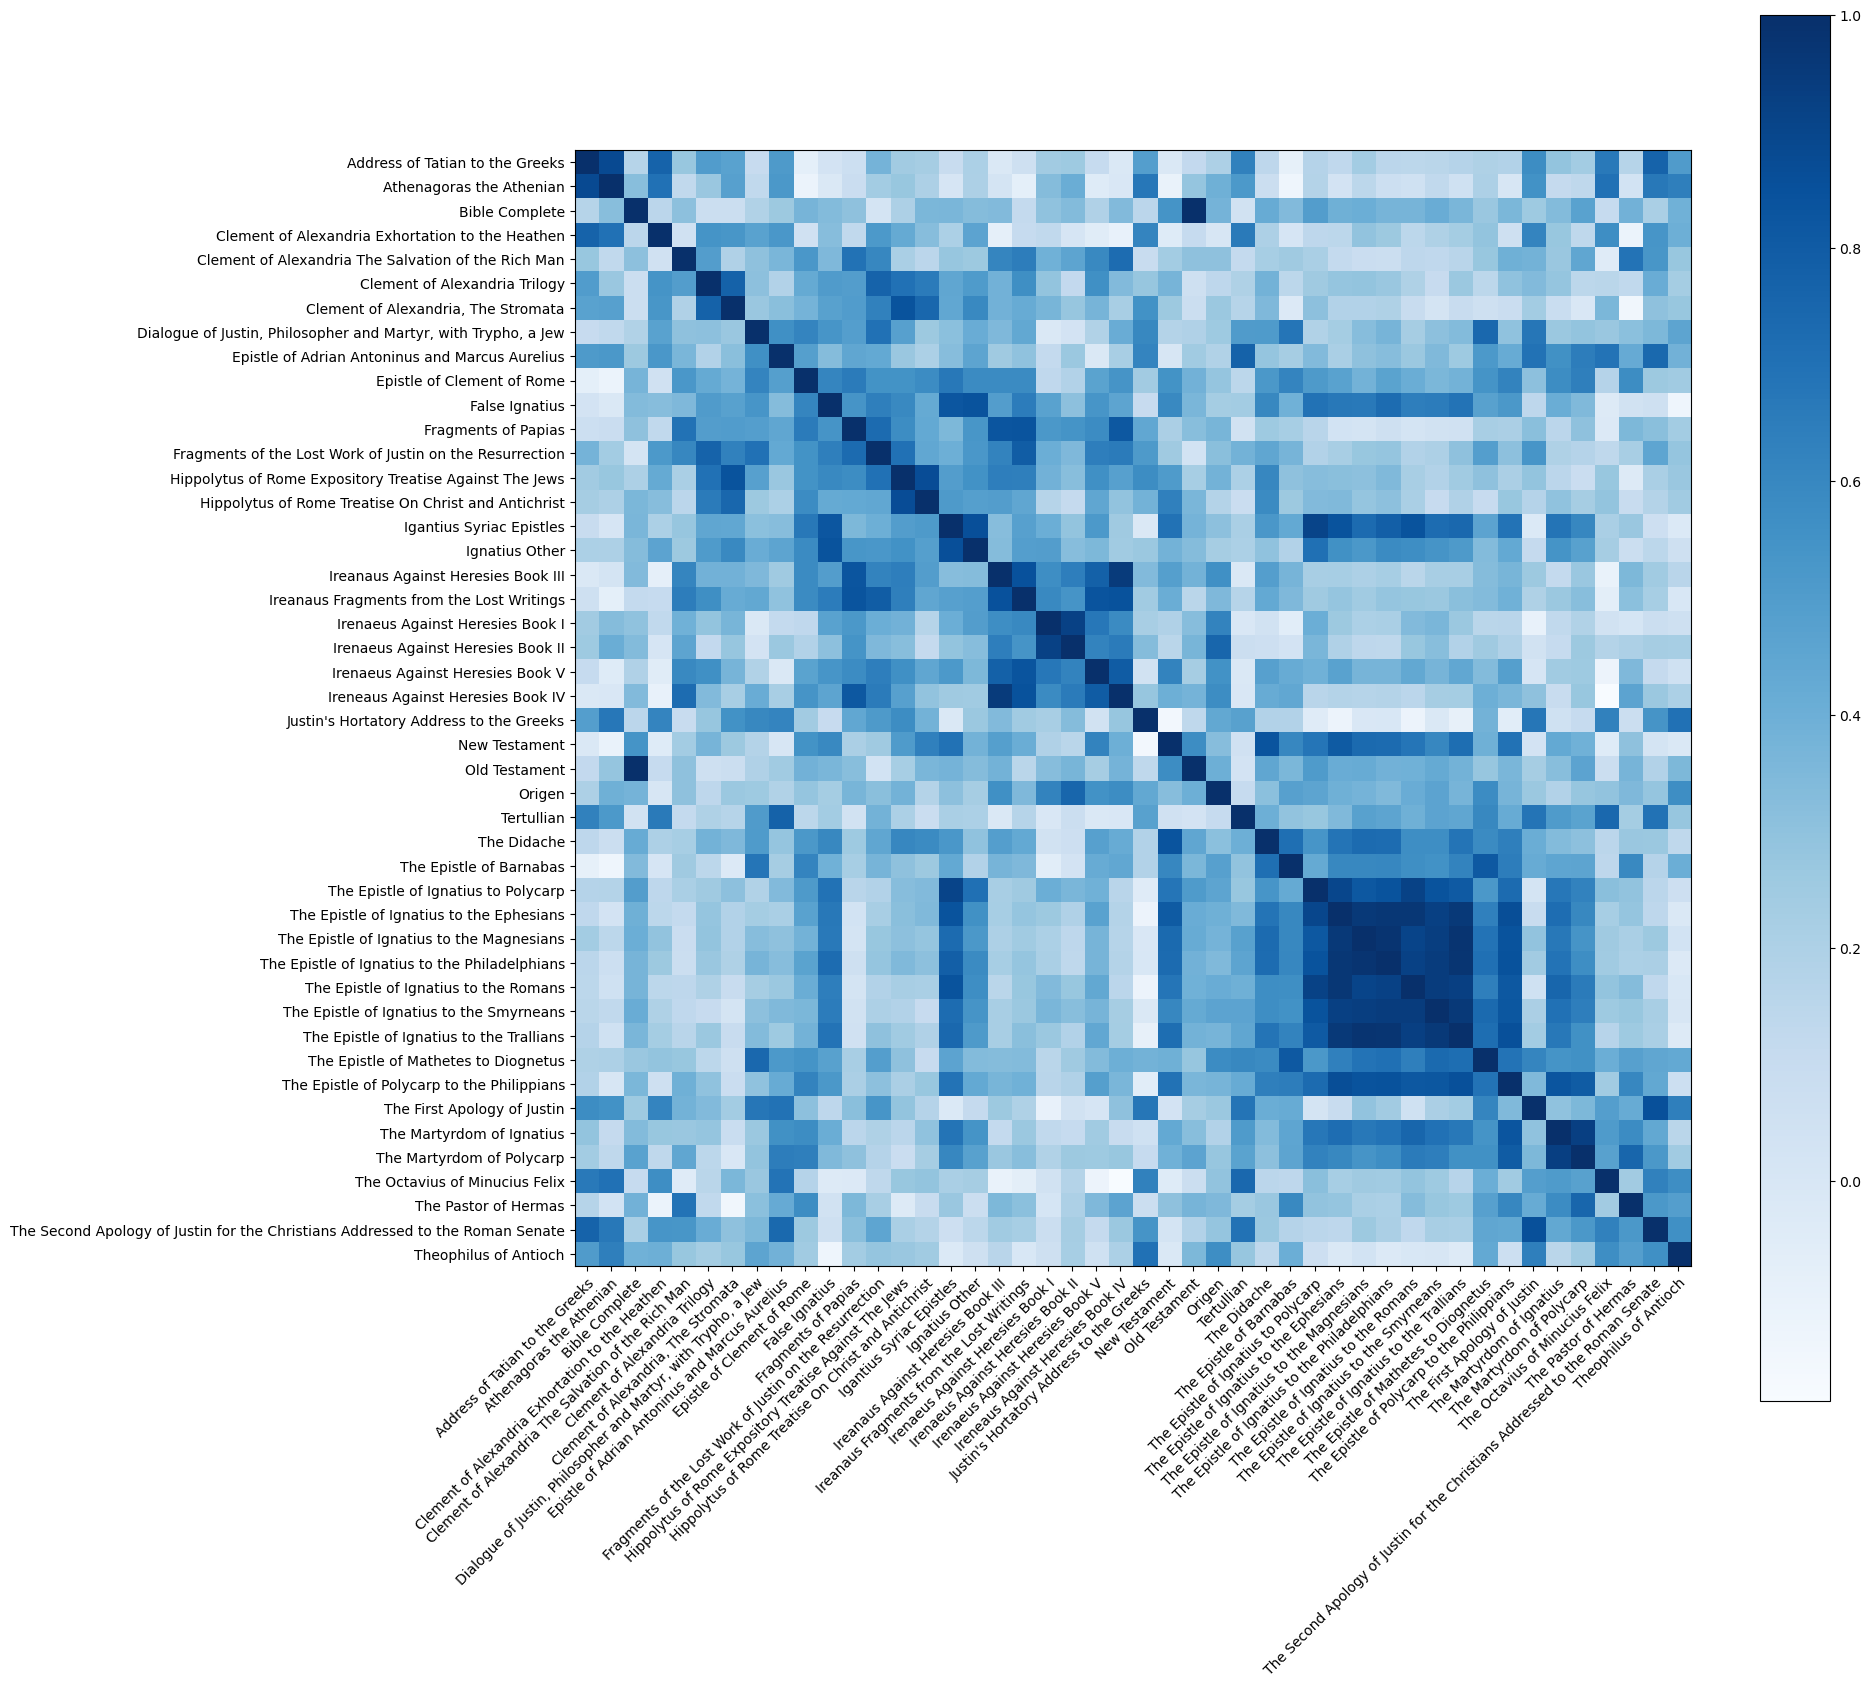

In [15]:
fig = plt.figure(figsize=(18,18))  # change the figsize to control the resolution
ax = fig.add_subplot(111)
cmap = matplotlib.colormaps['Blues']  # you may use other build-in colormap or define you own colormap
# if your data is not in range[0,1], use a normalization. Here is normalized by min and max values.
norm = Normalize(vmin=np.amin(similarity_matrix), vmax=np.amax(similarity_matrix))
image = ax.imshow(similarity_matrix, cmap=cmap, norm=norm)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(titles)), labels=titles)
ax.set_yticks(np.arange(len(titles)), labels=titles)

#rotate right by 45 degrees
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.colorbar(image)

plt.show()

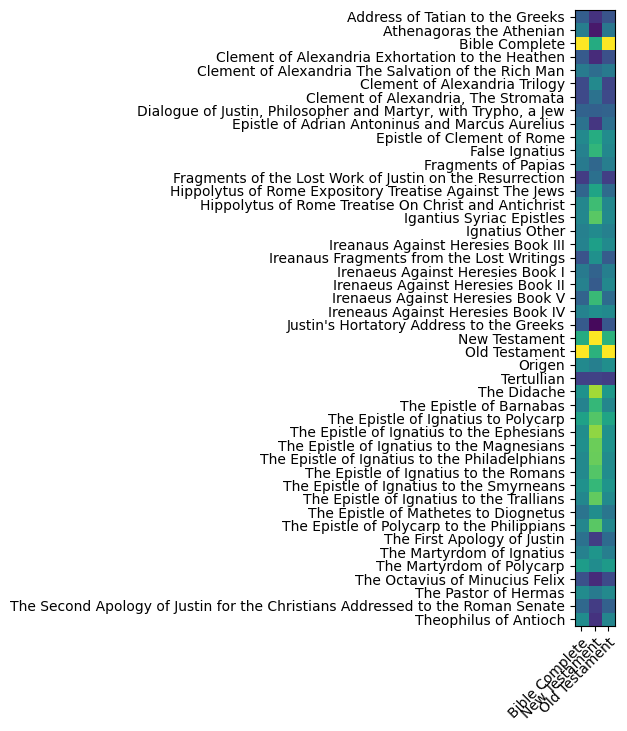

In [16]:
x_labels=['Bible Complete', 'New Testament', 'Old Testament']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
im = ax.imshow(bible_similarity, norm=norm)
norm = Normalize(vmin=np.amin(similarity_matrix), vmax=np.amax(similarity_matrix))
ax.set_yticks(np.arange(len(titles)), labels=titles)
ax.set_xticks(np.arange(len(x_labels)), labels=x_labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.show();

In [17]:
bible_similarity

,Bible Complete,New Testament,Old Testament
0,0.166804,-0.016543,0.118351
1,0.321604,-0.105158,0.282163
2,1.000000,0.544001,0.996069
3,0.149810,-0.043347,0.106212
4,0.304629,0.235224,0.299307
5,0.076883,0.370300,0.061585
6,0.075949,0.261097,0.074431
7,0.187443,0.174696,0.188472
8,0.259687,0.000776,0.244483
9,0.371895,0.545737,0.384236
